In [2]:
import os 
from pathlib import Path
import cv2
import sys
import matplotlib.pyplot as plt

from InferenceDataset import *
from SiameseNetworkAPI import *

/Users/racheltay/opt/anaconda3/envs/capstone/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:

model_file_path = '/Users/racheltay/Documents/school/cp5105-capstone-proj/src/siamese_model_e25_b8_lr1e-05_num8192_emb20.pth'

main_folder = '/Users/racheltay/Documents/school/cp5105-capstone-proj/data/inference_test/image/'
obj_folder = main_folder+'remote/'

video_path = '/Users/racheltay/Documents/school/cp5105-capstone-proj/data/inference_test/video/room1.mp4'

threshold = 0.5

In [4]:
all_img_of_obj = load_images_from_folder(obj_folder)

cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
sample_rate = 5
for fno in range(0, total_frames, sample_rate):
	cap.set(cv2.CAP_PROP_POS_FRAMES, fno)
	_, image = cap.read()
	
	xy_coords, conf_scores = SiameseNetworkAPI(all_img_of_obj, image).inference()
	print('conf_scores', conf_scores)

	if sum([x > threshold for x in conf_scores]).item() > 0:
		break

Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.10000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000), tensor(0.40000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.30000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.10000), tensor(0.50000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.30000), tensor(0.10000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.30000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.30000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.30000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.30000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.10000), tensor(0.20000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.20000), tensor(0.40000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000), tensor(0.20000)]


Using cache found in /Users/racheltay/.cache/torch/hub/ultralytics_yolov5_master


conf_scores [tensor(0.40000), tensor(0.30000), tensor(0.70000)]


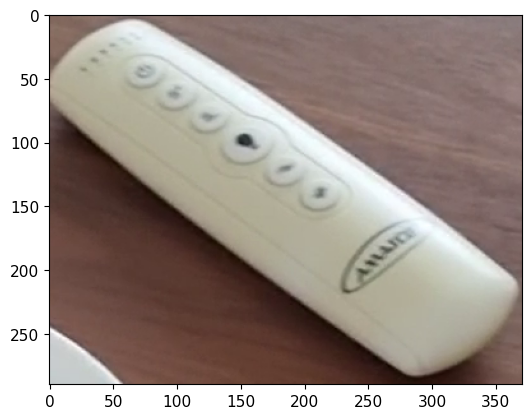

In [84]:
%matplotlib inline
x1, y1, x2, y2 = xy_coords[np.argmax(conf_scores)]
x1, y1, x2, y2 = round(x1.item()), round(y1.item()), round(x2.item()), round(y2.item())
plt.imshow(cv2.cvtColor(image[y1:y2, x1:x2], cv2.COLOR_BGR2RGB))
plt.show()